In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import peakutils
from pymatgen import Lattice, Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen import MPRester
#from pymatgen.analysis.surface_analysis import surface_energy
mpr = MPRester('2qcyWZOTDtz39pCU')
%matplotlib inline

# Background:
K$_{IC}$ following Irwin criteria:

\begin{equation}
K_{IC} = \left(\frac{E \gamma_0}{a_0}\frac{\rho \pi}{4}\right)^{\frac{1}{2}}
\end{equation}

In [28]:
# Get materials without multiple warning messages
msg1 = "One or more eigenvalues of the elastic tensor is negative"
msg2 = "Contains a rare earth element"
elast3 = mpr.query(criteria={"$and":[{"elasticity.warnings":{"$ne":msg1}},
                                   {"elasticity.warnings":{"$ne":msg2}}],
                            "elasticity":{"$exists":True}}, 
                  properties=['pretty_formula', 'material_id', 'elasticity',
                              'unit_cell_formula','structure.lattice.a'])

In [3]:
for i in range(25):
    print(elast3[i]['pretty_formula'], elast3[i]['elasticity']['elastic_tensor'][0][0])

CaTiO3 298.0
CoSe2 50.0
Ca2Sn3O8 160.0
Ca3AlSb3 66.0
Ti(WO4)2 149.0
CaSn2O5 192.0
Ta2O5 370.0
WO3 142.0
TiN 553.0
CaBi4O9 176.0
YMnO3 202.0
WO2 141.0
Zn(CuO2)2 227.0
MgFe2O5 136.0
Zn(CrSe2)2 100.0
Cu2B2C 117.0
CaVO3 270.0
Zn2Mo3O8 267.0
Ti(WO4)2 16.0
Cu2SnSe4 37.0
Ca2CoN2 152.0
YMoO3 161.0
Ca2Co2O5 127.0
Zn(WO2)2 220.0
YCuO3 135.0


In [46]:
df_elast = pd.DataFrame([i['elasticity'].values() for i in elast3])
df_elast.columns = list(elast3[0]['elasticity'].keys())

df = pd.DataFrame([[i['material_id'] for i in elast3], 
                   [i['pretty_formula'] for i in elast3],
                   [i['structure.lattice.a'] for i in elast3]])
df = df.T
df.columns = ['ID', 'Formula', 'a_0']
total = pd.concat([df, df_elast], axis=1)
total['E'] = total['G_Voigt']*2*(1+total['poisson_ratio'])

In [41]:
total.to_csv('props.csv')

In [47]:
total = total[['ID', 'Formula', 'a_0', 'E', 'elastic_tensor', 'compliance_tensor',
       'G_Voigt_Reuss_Hill', 'G_Reuss', 'elastic_tensor_original',
       'K_Voigt_Reuss_Hill', 'K_Reuss', 'universal_anisotropy', 'K_VRH',
       'state', 'G_VRH', 'homogeneous_poisson', 'K_Voigt', 'warnings',
       'poisson_ratio', 'G_Voigt', 'elastic_anisotropy']]

In [48]:
total.head()

,ID,Formula,a_0,E,elastic_tensor,compliance_tensor,G_Voigt_Reuss_Hill,G_Reuss,elastic_tensor_original,K_Voigt_Reuss_Hill,...,universal_anisotropy,K_VRH,state,G_VRH,homogeneous_poisson,K_Voigt,warnings,poisson_ratio,G_Voigt,elastic_anisotropy
0,mvc-11484,CaTiO3,5.40445,255.00,"[[298.0, 102.0, 119.0, 0.0, 0.0, 0.0], [102.0,...","[[4.2, -0.9, -1.4, 0.0, 0.0, 0.0], [-0.9, 3.8,...",101.0,101.0,"[[290.9880380803365, 119.08586425213885, 100.8...",172.0,...,0.04,172.0,successful,101.0,0.25,172.0,None,0.25,102.0,0.04
1,mvc-11438,CoSe2,6.88221,39.90,"[[50.0, 31.0, 31.0, 0.0, 0.0, 0.0], [31.0, 50....","[[37.6, -14.3, -14.3, 0.0, 0.0, 0.0], [-14.3, ...",14.0,13.0,"[[51.127623589742456, 30.182806372864224, 29.7...",37.0,...,0.51,37.0,successful,14.0,0.33,37.0,None,0.33,15.0,0.51
2,mvc-15350,Ca2Sn3O8,5.40743,128.38,"[[160.0, 55.0, 58.0, 0.0, -6.0, 0.0], [55.0, 2...","[[7.3, -1.3, -1.4, 0.0, 1.3, 0.0], [-1.3, 6.2,...",45.0,42.0,"[[210.70488832900375, 53.915062556348246, 89.5...",107.0,...,0.82,107.0,successful,45.0,0.31,109.0,None,0.31,49.0,0.82
3,mvc-16396,Ca3AlSb3,4.52392,57.50,"[[66.0, 22.0, 28.0, 0.0, 0.0, 0.0], [22.0, 59....","[[19.4, -5.3, -5.6, 0.0, 0.0, 0.0], [-5.3, 20....",23.0,23.0,"[[79.22536495129734, 28.54114038811037, 19.877...",38.0,...,0.08,38.0,successful,23.0,0.25,38.0,None,0.25,23.0,0.08
4,mvc-652,Ti(WO4)2,5.03707,116.84,"[[149.0, 67.0, 42.0, 0.0, 28.0, 0.0], [67.0, 1...","[[8.8, -2.9, -0.7, 0.0, -3.4, 0.0], [-2.9, 8.5...",44.0,42.0,"[[160.08899955855293, 58.040913263388006, 66.8...",83.0,...,0.69,83.0,successful,44.0,0.27,91.0,None,0.27,46.0,0.69


# Structures

In [23]:
print(mpr.get_structures(df['Formula'][4])[0])

Full Formula (Ti2 W4 O16)
Reduced Formula: Ti(WO4)2
abc   :   5.037069   5.823214   9.331617
angles:  90.000000  90.896139  90.000000
Sites (22)
  #  SP           a         b         c    coordination_no  forces
---  ----  --------  --------  --------  -----------------  --------------------------------------
  0  Ti    0.75      0.36819   0.25                      6  [0.0, -0.01020863, 0.0]
  1  Ti    0.25      0.631809  0.75                      6  [0.0, 0.01020863, 0.0]
  2  W     0.238512  0.164057  0.503075                  5  [-0.0718041, -0.06636334, -0.01583665]
  3  W     0.261487  0.164057  0.996926                  5  [0.0718041, -0.06636334, 0.01583665]
  4  W     0.761488  0.835943  0.496925                  5  [0.0718041, 0.06636334, 0.01583665]
  5  W     0.738513  0.835943  0.003074                  5  [-0.0718041, 0.06636334, -0.01583665]
  6  O     0.426895  0.339795  0.138238                  5  [-0.01613388, -0.00768875, 0.00324152]
  7  O     0.073104  0.339795  0.

# Surface Energy

In [49]:
df_filtered = total[total['Formula'].apply(lambda x: len(str(x)) <= 2)]
df_filtered

,ID,Formula,a_0,E,elastic_tensor,compliance_tensor,G_Voigt_Reuss_Hill,G_Reuss,elastic_tensor_original,K_Voigt_Reuss_Hill,...,universal_anisotropy,K_VRH,state,G_VRH,homogeneous_poisson,K_Voigt,warnings,poisson_ratio,G_Voigt,elastic_anisotropy
910,mp-2114,YN,3.47833,290.40,"[[317.0, 81.0, 81.0, 0.0, 0.0, 0.0], [81.0, 31...","[[3.5, -0.7, -0.7, 0.0, 0.0, 0.0], [-0.7, 3.5,...",121.0,121.0,"[[316.74398484911103, 80.94040764760717, 80.95...",160.0,...,0.00,160.0,successful,121.0,0.20,160.0,None,0.20,121.0,0.00
1054,mp-111,Ne,3.04326,2.74,"[[2.0, 2.0, 2.0, 0.0, 0.0, 0.0], [2.0, 2.0, 2....","[[1468.0, -637.2, -637.2, 0.0, 0.0, 0.0], [-63...",1.0,0.0,"[[2.039089163023462, 1.564165217245656, 1.5644...",2.0,...,2.13,2.0,filter_failed,1.0,0.37,2.0,"[Shear modulus (Reuss) is less than 2 GPa, Bul...",0.37,1.0,2.13
1376,mp-22898,KI,5.0808,15.12,"[[23.0, 3.0, 3.0, 0.0, 0.0, 0.0], [3.0, 23.0, ...","[[45.1, -5.1, -5.1, 0.0, 0.0, 0.0], [-5.1, 45....",6.0,5.0,"[[22.798903742291508, 2.881485914716736, 2.881...",10.0,...,1.30,10.0,successful,6.0,0.26,10.0,None,0.26,6.0,1.30
1578,mp-23158,He,2.73717,0.00,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0....","[[1601.9, -503.0, -503.0, 0.0, -0.0, -0.0], [-...",0.0,0.0,"[[0.8757514206982582, 0.40184829822832085, 0.4...",1.0,...,1.07,1.0,filter_failed,0.0,0.21,1.0,"[Shear modulus (Reuss) is less than 2 GPa, Bul...",0.21,0.0,1.07
1876,mp-23155,Ar,3.98863,0.00,"[[1.0, 1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1....","[[2022.7, -811.7, -811.7, 0.0, 0.0, 0.0], [-81...",0.0,0.0,"[[1.0699537352352417, 0.717465186208329, 0.717...",1.0,...,0.91,1.0,filter_failed,0.0,0.34,1.0,"[Shear modulus (Reuss) is less than 2 GPa, Bul...",0.34,0.0,0.91
2816,mvc-13303,VN,2.93587,299.70,"[[438.0, 199.0, 268.0, 0.0, -4.0, 0.0], [199.0...","[[3.8, -0.7, -1.9, 0.0, 0.1, 0.0], [-0.7, 2.4,...",100.0,88.0,"[[532.3683909443021, 198.31532836165343, 207.0...",308.0,...,1.28,308.0,successful,100.0,0.35,308.0,None,0.35,111.0,1.28
2820,mp-925,VN,2.9168,448.00,"[[654.0, 151.0, 151.0, 0.0, 0.0, 0.0], [151.0,...","[[1.7, -0.3, -0.3, 0.0, 0.0, 0.0], [-0.3, 1.7,...",165.0,155.0,"[[653.7809510232773, 151.44866059150948, 151.4...",319.0,...,0.63,319.0,successful,165.0,0.28,319.0,None,0.28,175.0,0.63
2833,mp-36,Sc,3.26726,63.36,"[[67.0, 43.0, 43.0, 0.0, 0.0, 0.0], [43.0, 67....","[[30.0, -11.7, -11.7, 0.0, 0.0, 0.0], [-11.7, ...",22.0,19.0,"[[67.29281582566117, 43.29572406632724, 43.302...",51.0,...,1.25,51.0,successful,22.0,0.32,51.0,None,0.32,24.0,1.25
2895,mp-463,KF,3.83534,42.84,"[[58.0, 14.0, 14.0, 0.0, 0.0, 0.0], [14.0, 58....","[[19.0, -3.7, -3.7, 0.0, 0.0, 0.0], [-3.7, 19....",17.0,16.0,"[[58.138206552463274, 14.234386003403769, 14.2...",29.0,...,0.28,29.0,successful,17.0,0.26,29.0,None,0.26,17.0,0.28
2913,mp-32,Ge,4.07496,111.86,"[[104.0, 37.0, 37.0, 0.0, 0.0, 0.0], [37.0, 10...","[[11.9, -3.1, -3.1, 0.0, 0.0, 0.0], [-3.1, 11....",45.0,44.0,"[[103.56845666550652, 36.68428623326502, 36.67...",59.0,...,0.32,59.0,successful,45.0,0.19,59.0,None,0.19,47.0,0.32


In [57]:
surf_data = []
for i in df_filtered['ID']:
    try:
        surf_data.append(mpr.get_surface_data(i)['weighted_surface_energy'])
    except Exception:
        surf_data.append(i)

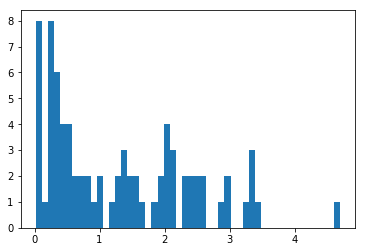

In [67]:
plt.hist(surf_data, bins=50)
plt.show()

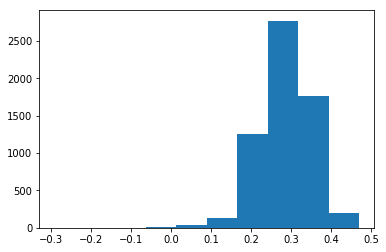

In [76]:
plt.hist(total.poisson_ratio)
plt.show()

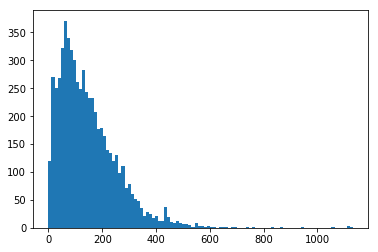

In [78]:
plt.hist(total.E, bins=100)
plt.show()

In [74]:
total.loc[total.E.argmax(1)]

ID                                                                     mp-47
Formula                                                                    C
a_0                                                                  2.51309
E                                                                    1132.06
elastic_tensor             [[1189.0, 97.0, 13.0, 0.0, 0.0, 0.0], [97.0, 1...
compliance_tensor          [[0.8, -0.1, -0.0, 0.0, 0.0, -0.0], [-0.1, 0.8...
G_Voigt_Reuss_Hill                                                       525
G_Reuss                                                                  521
elastic_tensor_original    [[1189.6476037707066, 96.43060558649381, 13.74...
K_Voigt_Reuss_Hill                                                       436
K_Reuss                                                                  436
universal_anisotropy                                                    0.08
K_VRH                                                                    436

In [86]:
total.sort_values(by='E', ascending=False)

,ID,Formula,a_0,E,elastic_tensor,compliance_tensor,G_Voigt_Reuss_Hill,G_Reuss,elastic_tensor_original,K_Voigt_Reuss_Hill,...,universal_anisotropy,K_VRH,state,G_VRH,homogeneous_poisson,K_Voigt,warnings,poisson_ratio,G_Voigt,elastic_anisotropy
4976,mp-47,C,2.51309,1132.06,"[[1189.0, 97.0, 13.0, 0.0, 0.0, 0.0], [97.0, 1...","[[0.8, -0.1, -0.0, 0.0, 0.0, -0.0], [-0.1, 0.8...",525.0,521.0,"[[1189.6476037707066, 96.43060558649381, 13.74...",436.0,...,0.08,436.0,successful,525.0,0.07,436.0,None,0.07,529.0,0.08
5663,mp-611426,C,2.51994,1123.50,"[[1171.0, 97.0, 36.0, 0.0, 0.0, 0.0], [97.0, 1...","[[0.9, -0.1, -0.0, 0.0, 0.0, -0.0], [-0.1, 0.9...",523.0,521.0,"[[1172.7002089351024, 95.63576417182676, 35.54...",436.0,...,0.04,436.0,successful,523.0,0.07,436.0,None,0.07,525.0,0.04
5892,mp-66,C,2.52762,1119.22,"[[1054.0, 126.0, 126.0, 0.0, 0.0, 0.0], [126.0...","[[1.0, -0.1, -0.1, 0.0, 0.0, 0.0], [-0.1, 1.0,...",520.0,518.0,"[[1054.123243435158, 126.46877402552144, 126.4...",436.0,...,0.04,436.0,successful,520.0,0.07,436.0,None,0.07,523.0,0.04
6026,mp-616440,C,2.52325,1119.22,"[[1160.0, 97.0, 48.0, 0.0, 0.0, 0.0], [97.0, 1...","[[0.9, -0.1, -0.0, 0.0, 0.0, -0.0], [-0.1, 0.9...",522.0,520.0,"[[1163.0668285590423, 95.48228660091308, 48.17...",436.0,...,0.02,436.0,successful,522.0,0.07,436.0,None,0.07,523.0,0.02
5770,mp-569567,C,14.5534,1117.08,"[[1159.0, 97.0, 46.0, 7.0, 0.0, 0.0], [97.0, 1...","[[0.9, -0.1, -0.0, -0.0, 0.0, 0.0], [-0.1, 0.9...",521.0,520.0,"[[1162.2038601386143, 96.34233238477165, 46.57...",435.0,...,0.03,435.0,successful,521.0,0.07,435.0,None,0.07,522.0,0.03
6132,mp-24,C,3.87865,1058.40,"[[1094.0, 34.0, 34.0, 0.0, 0.0, 0.0], [34.0, 1...","[[0.9, -0.0, -0.0, 0.0, 0.0, 0.0], [-0.0, 0.9,...",504.0,503.0,"[[1093.708198946184, 34.43767365638576, 34.353...",387.0,...,0.01,387.0,successful,504.0,0.05,387.0,None,0.05,504.0,0.01
6113,mp-1008395,C,2.51466,947.94,"[[1191.0, 58.0, 58.0, -0.0, 0.0, -0.0], [58.0,...","[[0.8, -0.0, -0.0, -0.0, -0.0, 0.0], [-0.0, 1....",420.0,413.0,"[[932.4435830048478, 171.42363342421243, 58.24...",403.0,...,0.16,403.0,successful,420.0,0.11,403.0,None,0.11,427.0,0.16
5198,mp-2653,BN,2.55517,866.88,"[[929.0, 130.0, 57.0, 0.0, 0.0, 0.0], [130.0, ...","[[1.1, -0.2, -0.1, 0.0, 0.0, -0.0], [-0.2, 1.1...",383.0,380.0,"[[930.2647680938319, 128.34999517832742, 55.95...",373.0,...,0.10,373.0,successful,383.0,0.12,373.0,None,0.12,387.0,0.10
2959,mp-1018649,BC5,2.55156,837.20,"[[827.0, 193.0, 86.0, 102.0, 0.0, 0.0], [193.0...","[[1.4, -0.4, -0.1, -0.5, -0.0, -0.0], [-0.4, 1...",347.0,330.0,"[[839.4484946043199, 182.12093640573312, 85.86...",378.0,...,0.51,378.0,successful,347.0,0.15,378.0,None,0.15,364.0,0.51
6153,mp-1985,C3N4,6.45053,763.20,"[[831.0, 257.0, 117.0, 0.0, 0.0, 0.0], [257.0,...","[[1.3, -0.4, -0.1, 0.0, 0.0, -0.0], [-0.4, 1.3...",312.0,307.0,"[[832.8691965930213, 256.27566077740875, 117.5...",409.0,...,0.17,409.0,successful,312.0,0.20,409.0,None,0.20,318.0,0.17


# Ni Benchmarking

In [143]:
K_IC = lambda E, y_0, a_0: (E*y_0/a_0*1e-5*np.pi/4)**(0.5)

In [139]:
total.loc[5672]['G_Voigt']*2*(1+total.loc[5672]['poisson_ratio'])

207.48000000000002

In [145]:
K_IC(207e9, 2.035, 2.481e-10)/1e6

115.47791610011936